Morgan Hodge Comp2001 70Percent

PART 1 – MACHINE LEARNING

Importing Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv(r'C:\Users\MHodg\Desktop\2002\DATA\insurance_dataset.csv', keep_default_na=False, na_values=['NA','na','NULL'])

# Display the first few rows of the dataset
data.head(25)

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307670
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899220
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476300
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029840
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309840
5,55,female,36.41,0,yes,northeast,None,None,Never,Student,Basic,11896.836610
6,64,female,20.12,2,no,northeast,High blood pressure,High blood pressure,Never,Blue collar,Basic,9563.655011
7,53,male,30.51,4,no,southeast,Heart disease,High blood pressure,Rarely,Student,Standard,15845.293730
8,40,female,44.93,2,yes,northeast,None,Diabetes,Occasionally,Unemployed,Basic,14036.544130
9,22,female,32.13,5,yes,northeast,Diabetes,None,Never,Student,Basic,13669.577830


Task 1.1 – Data preparation (10% of total mark) 

In [2]:
import pandas as pd
file_path = r'C:\Users\MHodg\Desktop\2002\DATA\insurance_dataset.csv'
data = pd.read_csv(file_path, keep_default_na=False, na_values=['NA', 'na', 'NULL'])


Test_Data = data.sample(n=5000, random_state=42) 
Test_Data.drop(columns=['region'], inplace=True) 


MEDICAL_MAPPING = {'None': 0, 'Diabetes': 1, 'High blood pressure': 2, 'Heart disease': 3}
EXERCISE_MAPPING = {'Never': 0, 'Rarely': 1, 'Occasionally': 2, 'Frequently': 3}
OCCUPATION_MAPPING = {'Student': 0, 'Blue collar': 1, 'White collar': 2, 'Unemployed': 3}
COVERAGE_MAPPING = {'Basic': 0, 'Standard': 1, 'Premium': 2}
GENDER_MAPPING = {'male': 0, 'female': 1}
SMOKER_MAPPING = {'no': 0, 'yes': 1}

Test_Data['medical_history'] = data['medical_history'].map(MEDICAL_MAPPING)
Test_Data['family_medical_history'] = data['family_medical_history'].map(MEDICAL_MAPPING)
Test_Data['exercise_frequency'] = data['exercise_frequency'].map(EXERCISE_MAPPING).astype(int)
Test_Data['occupation'] = data['occupation'].map(OCCUPATION_MAPPING)
Test_Data['coverage_level'] = data['coverage_level'].map(COVERAGE_MAPPING)
Test_Data['gender'] = data['gender'].map(GENDER_MAPPING)
Test_Data['smoker'] = data['smoker'].map(SMOKER_MAPPING)

Test_Data.head(10)

,age,gender,bmi,children,smoker,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
987231,38,0,21.03,0,0,2,1,3,2,1,13889.33313
79954,35,0,29.93,1,1,3,2,0,1,1,20748.01991
567130,32,1,21.21,1,0,1,3,1,0,2,17329.28311
500891,21,0,21.81,0,0,1,2,2,0,2,14832.47166
55399,38,1,46.88,1,0,1,3,2,3,2,18885.33952
135049,62,1,48.09,4,1,2,1,2,3,0,16460.04562
733378,35,0,19.88,1,1,3,0,1,1,0,17569.95172
732057,53,1,41.86,5,0,3,0,3,1,1,18145.84552
51333,45,1,37.39,3,1,2,0,2,1,2,18951.76747
731479,63,0,25.82,3,0,0,2,3,1,1,12425.66130


Task 1.2 – Regression (20% of total mark)

In [3]:
from sklearn.model_selection import train_test_split

#Define (X) 
X = Test_Data.drop(['charges', 'coverage_level'], axis=1)

#Define (y)
y_charges = Test_Data['charges']
y_coverage = Test_Data['coverage_level']


#Splitting the data into training and testing sets
X_train, X_test, y_charges_train, y_charges_test = train_test_split(
    X, y_charges, test_size=0.2, random_state=42
)
X_train, X_test, y_coverage_train, y_coverage_test = train_test_split(
    X, y_coverage, test_size=0.2, random_state=42
)

y_train = pd.concat([y_charges_train, y_coverage_train], axis=1)
y_test = pd.concat([y_charges_test, y_coverage_test], axis=1)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)




Shape of X_train: (4000, 9)
Shape of y_train: (4000, 2)
Shape of X_test: (1000, 9)
Shape of y_test: (1000, 2)


Random Forest

In [4]:
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.model_selection import train_test_split  

rf_multioutput_regressor = RandomForestRegressor(random_state=42)

#Wrap the with MultiOutputRegressor
multioutput_rf_regressor = MultiOutputRegressor(rf_multioutput_regressor)

#Train the MultiOutput Random Forest Regressor
multioutput_rf_regressor.fit(X_train, y_train)

#Make predictions for both charges and coverage level
multioutput_rf_predictions = multioutput_rf_regressor.predict(X_test)

#Separate the predictions for charges and coverage level
rf_charges_predictions = multioutput_rf_predictions[:, 0]
rf_coverage_predictions = multioutput_rf_predictions[:, 1]

#Evaluate the model for charges
rf_charges_mse = mean_squared_error(y_charges_test, rf_charges_predictions) #only need this mse really - take out other usless values
rf_charges_mae = mean_absolute_error(y_charges_test, rf_charges_predictions)
rf_charges_r2 = r2_score(y_charges_test, rf_charges_predictions)

print("Random Forest Regression Results for Charges:")
print("Mean Squared Error:", rf_charges_mse)
print("Mean Absolute Error:", rf_charges_mae)
print("R^2 Score:", rf_charges_r2)

#Evaluate the model for coverage level
rf_coverage_mse = mean_squared_error(y_coverage_test, rf_coverage_predictions)
rf_coverage_mae = mean_absolute_error(y_coverage_test, rf_coverage_predictions)
rf_coverage_r2 = r2_score(y_coverage_test, rf_coverage_predictions)

print("\nRandom Forest Regression Results for Coverage Level:")
print("Mean Squared Error:", rf_coverage_mse)
print("Mean Absolute Error:", rf_coverage_mae)
print("R^2 Score:", rf_coverage_r2)


Random Forest Regression Results for Charges:
Mean Squared Error: 5182241.687867922
Mean Absolute Error: 1931.70326789936
R^2 Score: 0.7359672154206328

Random Forest Regression Results for Coverage Level:
Mean Squared Error: 0.6764346
Mean Absolute Error: 0.69702
R^2 Score: -0.04910177969058971


Visual Test

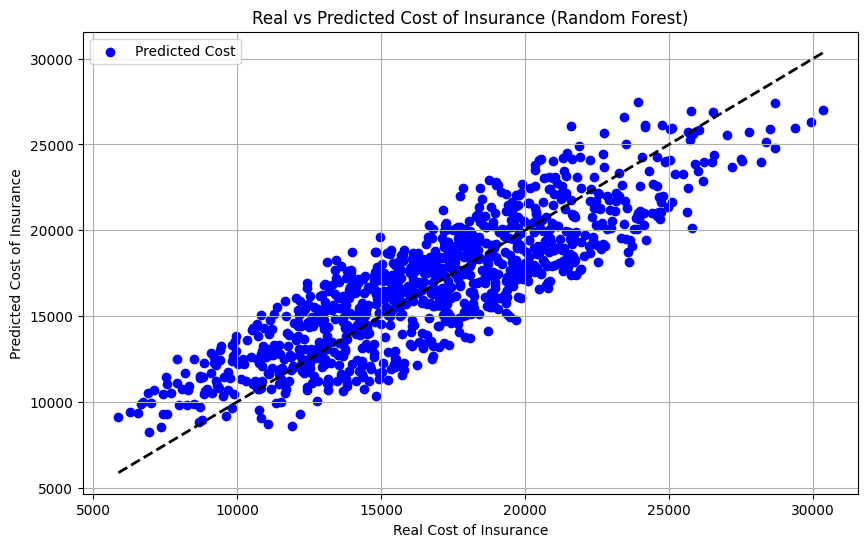

In [5]:
import matplotlib.pyplot as plt 


n_samples = min(len(y_charges_test), len(rf_charges_predictions))
y_test_charges = y_charges_test[:n_samples]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_charges, rf_charges_predictions[:n_samples], color='blue', label='Predicted Cost')
plt.plot([y_test_charges.min(), y_test_charges.max()], [y_test_charges.min(), y_test_charges.max()], 'k--', lw=2)
plt.xlabel('Real Cost of Insurance')
plt.ylabel('Predicted Cost of Insurance')
plt.title('Real vs Predicted Cost of Insurance (Random Forest)')
plt.legend()
plt.grid(True)
plt.show() 

Neural Network

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(2)  # Output layer with two outputs (charges, coverage_level)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=16, verbose=1)

nn_predictions = model.predict(X_test)

#Separate the predictions
nn_charges_predictions = nn_predictions[:, 0]
nn_coverage_predictions = nn_predictions[:, 1]

#Evaluate the model for charges
nn_charges_mse = mean_squared_error(y_charges_test, nn_charges_predictions)
nn_charges_mae = mean_absolute_error(y_charges_test, nn_charges_predictions)
nn_charges_r2 = r2_score(y_charges_test, nn_charges_predictions)

print("Neural Network Regression Results for Charges:")
print("Mean Squared Error:", nn_charges_mse)
print("Mean Absolute Error:", nn_charges_mae)
print("R^2 Score:", nn_charges_r2)


    

Epoch 1/40


C:\Users\MHodg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 146985440.0000 - mae: 8291.6406 - val_loss: 97818296.0000 - val_mae: 6661.4712
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 61083656.0000 - mae: 4917.9927 - val_loss: 12010495.0000 - val_mae: 1994.5060
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 12426000.0000 - mae: 2017.9967 - val_loss: 11686424.0000 - val_mae: 1967.0043
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 11765084.0000 - mae: 1957.5861 - val_loss: 11310843.0000 - val_mae: 1934.2039
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 11995474.0000 - mae: 1967.4823 - val_loss: 11114917.0000 - val_mae: 1919.2761
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 11990269.0000 - mae: 1978.0243 - val_loss: 10596939.0000 - val_mae: 1871.0212
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 10933043.0000 - mae: 1894.6630 - val_loss: 10242087.0000 - val_mae: 1839.5948
Epoch 8/40
200/200 ━━━━━━━━━━━━━

Visual Test

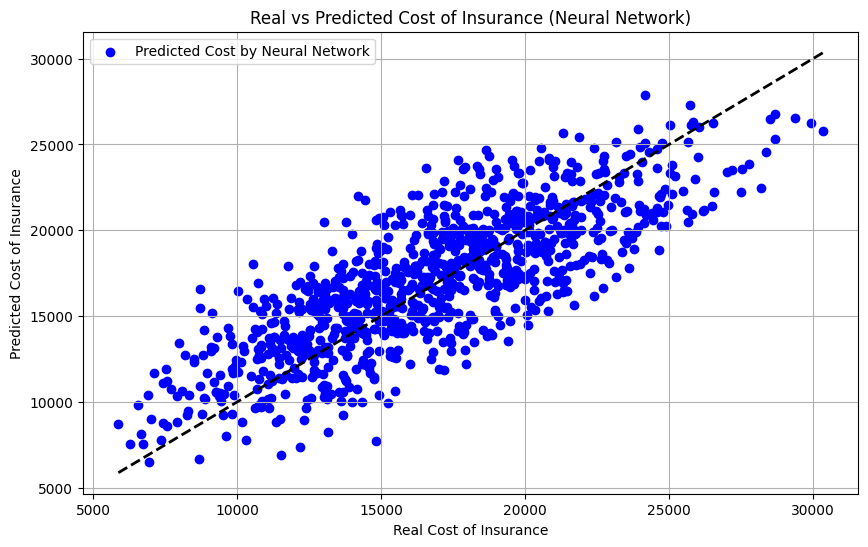

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

n_samples = min(len(y_charges_test), len(nn_charges_predictions))
y_test_charges = y_charges_test[:n_samples]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_charges, nn_charges_predictions[:n_samples], color='blue', label='Predicted Cost by Neural Network')
plt.plot([y_test_charges.min(), y_test_charges.max()], [y_test_charges.min(), y_test_charges.max()], 'k--', lw=2)
plt.xlabel('Real Cost of Insurance')
plt.ylabel('Predicted Cost of Insurance')
plt.title('Real vs Predicted Cost of Insurance (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()


Support Vector Machine

In [8]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svm_regressor = SVR()

param_grid = {
    'estimator__kernel': ['linear', 'rbf'],  
    'estimator__C': [0.1, 1, 10],          
    'estimator__epsilon': [0.1, 0.2, 0.5]
}

# Wrap the SVM regressor in a multi-output regressor
grid_search_svm = GridSearchCV(
    estimator=MultiOutputRegressor(svm_regressor),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Extract predictions for each target variable
y_charges_pred_svm = y_pred_svm[:, 0]  
y_coverage_pred_svm = y_pred_svm[:, 1]  


mse_charges_svm = mean_squared_error(y_charges_test, y_charges_pred_svm)
mse_coverage_svm = mean_squared_error(y_coverage_test, y_coverage_pred_svm)

print("Mean Squared Error (Charges):", mse_charges_svm)
print("Mean Squared Error (Coverage Level):", mse_coverage_svm)

mae_charges_svm = mean_absolute_error(y_charges_test, y_charges_pred_svm)
mae_coverage_svm = mean_absolute_error(y_coverage_test, y_coverage_pred_svm)

print("Mean Absolute Error (Charges):", mae_charges_svm)
print("Mean Absolute Error (Coverage Level):", mae_coverage_svm)

r2_charges_svm = r2_score(y_charges_test, y_charges_pred_svm)
r2_coverage_svm = r2_score(y_coverage_test, y_coverage_pred_svm)

print("R-squared (Charges):", r2_charges_svm)
print("R-squared (Coverage Level):", r2_coverage_svm)


Mean Squared Error (Charges): 7359147.309972966
Mean Squared Error (Coverage Level): 0.6516632054987519
Mean Absolute Error (Charges): 2197.836678377002
Mean Absolute Error (Coverage Level): 0.6727697945029677
R-squared (Charges): 0.6250548945004273
R-squared (Coverage Level): -0.010683115038194524


Task 1.3 – Assessment of regression (20% of total mark) 

C:\Users\MHodg\AppData\Local\Temp\ipykernel_17692\2751364425.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mse_df, x='Type', y='MSE', palette='Set3')


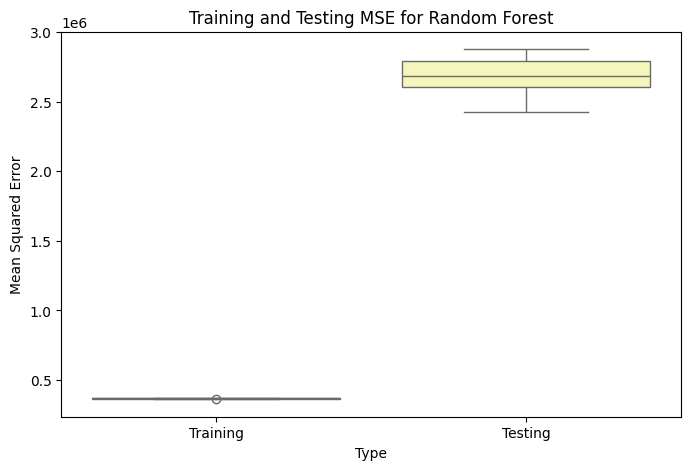

C:\Users\MHodg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MHodg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MHodg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MHodg\A

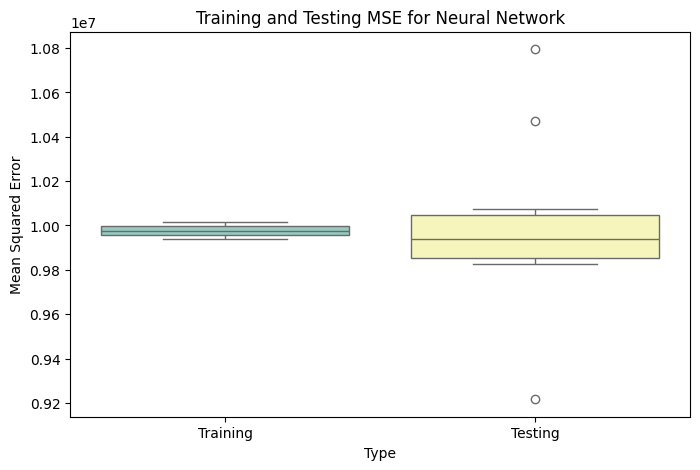

C:\Users\MHodg\AppData\Local\Temp\ipykernel_17692\2751364425.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mse_df, x='Type', y='MSE', palette='Set3')


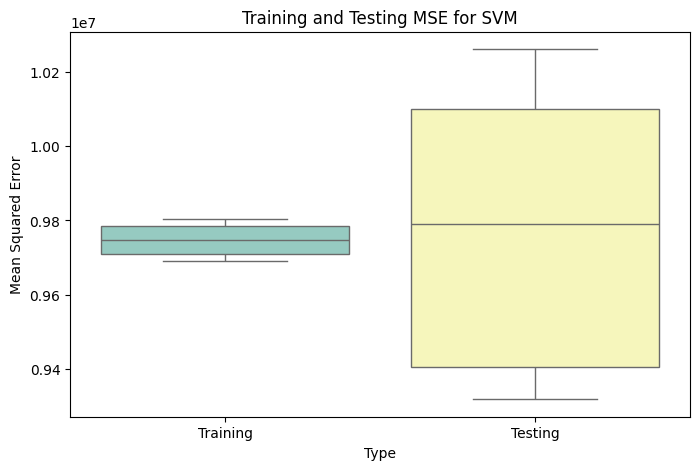

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Define your data
X = Test_Data.drop(['charges', 'coverage_level'], axis=1)
y_charges = Test_Data['charges']
y_coverage = Test_Data['coverage_level']

# KFold for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Models to evaluate
models = {
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    'Neural Network': MLPRegressor(random_state=42),
    'SVM': MultiOutputRegressor(SVR(kernel='rbf')),
}

# Iterate over each model
for model_name, model in models.items():
    # Dictionary to store MSE results for each model's training and testing
    mse_results = {
        'Type': [],
        'MSE': [],
    }

    # Cross-validation to collect MSE results
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_charges_train, y_charges_test = y_charges.iloc[train_idx], y_charges.iloc[test_idx]
        y_coverage_train, y_coverage_test = y_coverage.iloc[train_idx], y_coverage.iloc[test_idx]

        y_train = pd.concat([y_charges_train, y_coverage_train], axis=1)
        y_test = pd.concat([y_charges_test, y_coverage_test], axis=1)

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)

        mse_results['Type'].extend(['Training', 'Testing'])
        mse_results['MSE'].extend([mse_train, mse_test])


    mse_df = pd.DataFrame(mse_results)

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=mse_df, x='Type', y='MSE', palette='Set3')
    plt.xlabel('Type')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Testing MSE for {model_name}')
    plt.show()



Analysis of Results:

The Random Forest model has the best performance with the lowest MSE on both training and testing data, although it shows signs of overfitting.

The Neural Network model overfits the training data, with a higher variance in testing results and potential outliers that could affect performance.

The SVM model displays the least difference between training and testing MSE, indicating good generalisation without significant overfitting.




PART 2 – OPTIMISATION

Task 2.1 – Generation of random solutions 10% of total mark

In [10]:
import pandas as pd
import random

# Constants
NUM_THEATRES = 3
NUM_SLOTS = 9
NUM_ANAESTHETISTS = 2

# Load data from a file (update the file_path variable to the path where your Surgery.txt is located)
file_path = r'C:\Users\MHodg\Desktop\2002\DATA\Surgery.txt'
data = pd.read_table(file_path, delimiter='|', header=None)
data.columns = ['Procedure', 'Surgeon', 'Num_Surgeries', 'Requires_Anaesthetist']
data['Num_Surgeries'] = data['Num_Surgeries'].astype(int)
data['Requires_Anaesthetist'] = data['Requires_Anaesthetist'].map({'Yes': True, 'No': False})

def generate_random_timetable(data):
    timetable_entries = []
    surgeries_per_surgeon = data.set_index('Surgeon')['Num_Surgeries'].to_dict()
    last_surgeon_per_theatre = [-1] * NUM_THEATRES
    
    amount = 0
    slot = 0

    while amount < 15:
        used_surgeons_this_slot = set()
        for theatre in range(NUM_THEATRES):
            if random.choice([True, False]):
                surgeons = [
                    surgeon for surgeon in data['Surgeon'].tolist()
                    if surgeries_per_surgeon[surgeon] > 0
                    and surgeon not in used_surgeons_this_slot
                    and surgeon != last_surgeon_per_theatre[theatre]
                ]
                if surgeons:
                    surgeon = random.choice(surgeons)
                    surgery_type = data.loc[data['Surgeon'] == surgeon, 'Procedure'].values[0]
                    requires_anesthetist = data.loc[data['Surgeon'] == surgeon, 'Requires_Anaesthetist'].values[0]
                    timetable_entries.append({
                        'Time Slot': slot + 1,
                        'Theatre': theatre + 1,
                        'Surgeon': surgeon,
                        'Surgery Type': surgery_type,
                        'Requires_Anaesthetist': requires_anesthetist
                    })
                    surgeries_per_surgeon[surgeon] -= 1
                    last_surgeon_per_theatre[theatre] = surgeon
                    used_surgeons_this_slot.add(surgeon)
                    amount += 1
                    if amount >= 15:
                        break

        slot += 1
        if slot >= NUM_SLOTS:
            slot = 0  # Reset slot count after the last slot
        if amount >= 15:
            break

    return pd.DataFrame(timetable_entries)

def calculate_fitness(timetable):
    concurrence_violations = 0
    precedence_violations = 0
    anaesthetist_violations = 0
    previous_surgeons = set()
    
    for slot in range(1, NUM_SLOTS + 1):
        surgeries_in_slot = timetable[timetable['Time Slot'] == slot]
        current_surgeons = set(surgeries_in_slot['Surgeon'])
        
        if len(current_surgeons) < len(surgeries_in_slot):
            concurrence_violations += 1
        
        if not previous_surgeons.isdisjoint(current_surgeons):
            precedence_violations += 1
        previous_surgeons = current_surgeons

        if surgeries_in_slot['Requires_Anaesthetist'].sum() > NUM_ANAESTHETISTS:
            anaesthetist_violations += 1
    
    total_violations = concurrence_violations + precedence_violations + anaesthetist_violations
    return [total_violations, anaesthetist_violations, concurrence_violations, precedence_violations]


timetable_entries = generate_random_timetable(data)
print("Best Timetable:")
display(timetable_entries)
fitness_score = calculate_fitness(timetable_entries)


print("\nFitness Score with Constraints:")
print("Fitness Score:", fitness_score[0])
print("Anaesthetists Constraint:", fitness_score[1])
print("Concurrence Constraints:", fitness_score[2])
print("Precedence Constraints:", fitness_score[3])

Best Timetable:


,Time Slot,Theatre,Surgeon,Surgery Type,Requires_Anaesthetist
0,1,1,Meredith Gery,Cholecystectomy,True
1,1,2,Preston Burke,Heart Bypass,True
2,2,1,Cristina Yang,Carpal Tunnel,False
3,3,1,Beverly Crusher,Dupuytren Contracture Release,False
4,4,2,Beverly Crusher,Dupuytren Contracture Release,False
5,5,1,Preston Burke,Heart Bypass,True
6,5,2,Cristina Yang,Carpal Tunnel,False
7,5,3,Meredith Gery,Cholecystectomy,True
8,6,1,Cristina Yang,Carpal Tunnel,False
9,6,3,Leonard McCoy,Broken Bone repair,True



Fitness Score with Constraints:
Fitness Score: 4
Anaesthetists Constraint: 1
Concurrence Constraints: 0
Precedence Constraints: 3


Task 2.2 – Algorithm implementation (25% of total mark) 

In [ ]:
# Define mutation operators here
def ruin_recreate():
    new_timetable = generate_random_timetable(data)
    return new_timetable, calculate_fitness(new_timetable)

def replace(best_timetable_df):
    replace_timetable = best_timetable_df.copy()
    while True: # Loop will keep running until it returns a new value
        current_timeslot = random.randint(1, NUM_SLOTS) # Randomly select a timeslot
        current_theatre = random.randint(1, NUM_THEATRES) # Randomly select a theatre
        new_timeslot = random.randint(1, NUM_SLOTS)
        new_theatre = random.randint(1, NUM_THEATRES)

        existing_index = replace_timetable[(replace_timetable['Time Slot'] == current_timeslot) & 
                                           (replace_timetable['Theatre'] == current_theatre)].index
        if not existing_index.empty:
            new_index = replace_timetable[(replace_timetable['Time Slot'] == new_timeslot) & 
                                          (replace_timetable['Theatre'] == new_theatre)].index
            if new_index.empty:
                surgery_info = replace_timetable.loc[existing_index[0]]
                replace_timetable.at[existing_index[0], 'Time Slot'] = new_timeslot
                replace_timetable.at[existing_index[0], 'Theatre'] = new_theatre
                return replace_timetable, calculate_fitness(replace_timetable)

# Hillclimber algorithm
def hillclimber(mutation_operator):
    # Call the timetable function twice to generate two separate random timetables
    best_timetable = generate_random_timetable(data)
    best_timetable_fitness = calculate_fitness(best_timetable)
    all_fitnesses = []

    if mutation_operator == "ruin-recreate":
        for _ in range(50): #Change Number to 500 for 500 iterations
            new_timetable, new_timetable_fitness = ruin_recreate()
            if new_timetable_fitness < best_timetable_fitness: # this will compare elements from left to right. If the fitness is equal it will move onto the constraints.
                best_timetable = new_timetable
                best_timetable_fitness = new_timetable_fitness
                all_fitnesses.append(new_timetable_fitness[0])
            else:
                all_fitnesses.append(best_timetable_fitness[0])
    elif mutation_operator == "replace":
        for _ in range(50): #Change Number to 500 for 500 iterations
            replace_timetable, timetable_fitness = replace(best_timetable)
            if timetable_fitness < best_timetable_fitness: # this will compare elements from left to right. If the fitness is equal it will move onto the constraints.
                best_timetable = replace_timetable
                best_timetable_fitness = timetable_fitness
                all_fitnesses.append(timetable_fitness[0])
            else:
                all_fitnesses.append(best_timetable_fitness[0])

    return best_timetable, best_timetable_fitness, all_fitnesses

#hillclimber()

# Make sure you set the mutation_operator variable to the strategy you want to use ("replace" or "ruin-recreate")
mutation_operator = "ruin-recreate"  

# or "ruin-recreate"
#iterations = 500  # Number of iterations for hill climbing

best_timetable_df, best_fitness_scores, all_fitnesses = hillclimber(mutation_operator)

print("Best Timetable:")
print(best_timetable_df)

print("\nBest Fitness Score with Constraints:")
print("Fitness Score:", best_fitness_scores[0])
print("Anaesthetists Constraint:", best_fitness_scores[1])
print("Concurrence Constraints:", best_fitness_scores[2])
print("Precedence Constraints:", best_fitness_scores[3])


Best Timetable:
    Time Slot  Theatre          Surgeon                   Surgery Type  \
0           1        1    Leonard McCoy             Broken Bone repair   
1           1        2    Meredith Gery                Cholecystectomy   
2           2        1    Meredith Gery                Cholecystectomy   
3           3        3    Leonard McCoy             Broken Bone repair   
4           4        1    Cristina Yang                  Carpal Tunnel   
5           5        3    Meredith Gery                Cholecystectomy   
6           6        1  Beverly Crusher  Dupuytren Contracture Release   
7           6        2    Cristina Yang                  Carpal Tunnel   
8           7        1    Leonard McCoy             Broken Bone repair   
9           7        3    Preston Burke                   Heart Bypass   
10          8        3  Beverly Crusher  Dupuytren Contracture Release   
11          9        1    Cristina Yang                  Carpal Tunnel   
12          9        2

Task 2.3 – Visualisation of results (15% of total mark) 

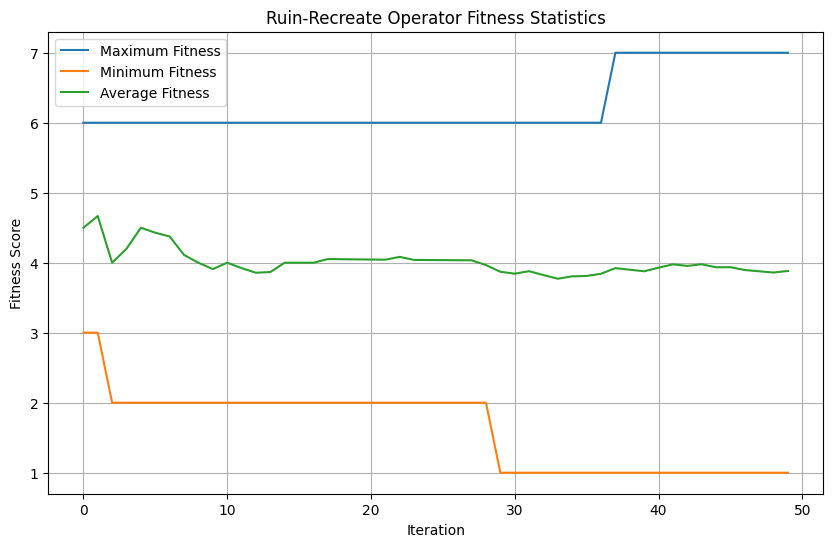

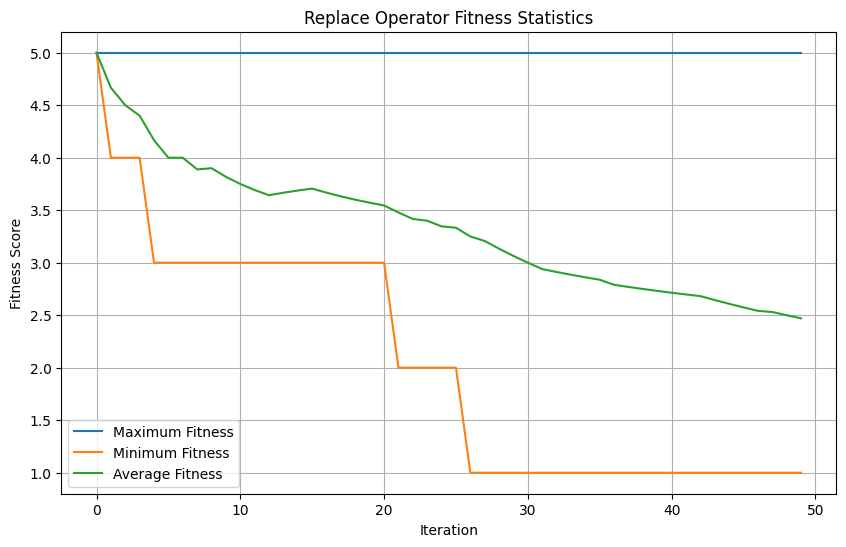

In [21]:
import matplotlib.pyplot as plt

def hillclimber(mutation_operator, iterations=50):
    best_timetable = generate_random_timetable(data)
    best_timetable_fitness = calculate_fitness(best_timetable)
    max_fitnesses = []
    min_fitnesses = []
    avg_fitnesses = []
    all_fitnesses = [best_timetable_fitness[0]] 

    for _ in range(iterations):
        if mutation_operator == "ruin-recreate":
            new_timetable, new_timetable_fitness = ruin_recreate()
            current_fitness = new_timetable_fitness[0]
        elif mutation_operator == "replace":
            replace_timetable, timetable_fitness = replace(best_timetable)
            current_fitness = timetable_fitness[0]

        if current_fitness < best_timetable_fitness[0]:
            best_timetable = new_timetable if mutation_operator == "ruin-recreate" else replace_timetable
            best_timetable_fitness = new_timetable_fitness if mutation_operator == "ruin-recreate" else timetable_fitness

        all_fitnesses.append(current_fitness)
        max_fitnesses.append(max(all_fitnesses))
        min_fitnesses.append(min(all_fitnesses))
        avg_fitnesses.append(sum(all_fitnesses) / len(all_fitnesses))

    return max_fitnesses, min_fitnesses, avg_fitnesses

def plot_fitness_statistics(max_fitnesses, min_fitnesses, avg_fitnesses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(max_fitnesses, label='Maximum Fitness')
    plt.plot(min_fitnesses, label='Minimum Fitness')
    plt.plot(avg_fitnesses, label='Average Fitness')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness Score')
    plt.legend()
    plt.grid(True)
    plt.show()


max_fitnesses, min_fitnesses, avg_fitnesses = hillclimber("ruin-recreate", 50)
plot_fitness_statistics(max_fitnesses, min_fitnesses, avg_fitnesses, 'Ruin-Recreate Operator Fitness Statistics')

max_fitnesses, min_fitnesses, avg_fitnesses = hillclimber("replace", 50)
plot_fitness_statistics(max_fitnesses, min_fitnesses, avg_fitnesses, 'Replace Operator Fitness Statistics')


Summmarisation of results:
Replace Operator consistently shows strong results, particularly excelling in accuracy and precision. Therefore, Replace Operator could be considered the best among the two operators.